In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import numpy.random as rd


### Criar dados (XOR)

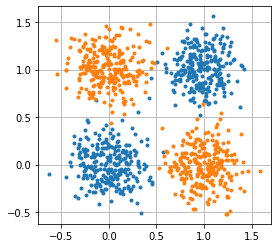

In [3]:
N=250
sc=0.2
x00=rd.randn(2,N)*sc
x11=rd.randn(2,N)*sc+1
x0=np.hstack((x00,x11))
x01=rd.randn(2,N)*sc
x01[1,:]=x01[1,:]+1
x10=rd.randn(2,N)*sc
x10[0,:]=x10[0,:]+1
x1=np.hstack((x10,x01))

X=np.hstack((x0,x1))
y=np.hstack((-np.ones(500),np.ones(500)))
plt.plot(x0[0,:],x0[1,:],'.',x1[0,:],x1[1,:],'.')
plt.axis('scaled')
plt.grid(True)

In [12]:
y.shape

(1000,)

## Inicializações + Treino dos parâmetros

In [55]:
nH=10
W1=rd.randn(2,nH)*0.5
b1=np.zeros(nH)
b1=b1[:,np.newaxis]
W2=rd.randn(nH)*.5
W2=W2[:,np.newaxis]
eta =1e-4
alpha=0.9
Iter=1500
dzW1=np.zeros(W1.shape)
dzb1=np.zeros(b1.shape)
dzW2=np.zeros(W2.shape)
Err=np.zeros(Iter)
for i in range(Iter):
    U=np.dot(W1.T,X)+b1
    V=np.tanh(U)
    z=np.dot(W2.T,V)
    yh=np.tanh(z)
    #Erro
    E=y-yh
    Err[i]=np.mean(E**2)
    #gradientes
    dz=-2*E*(1-yh**2)
    dW2=np.dot(V,dz.T)
    dV=np.dot(W2,dz)
    dU=(1-V**2)*dV
    db1=np.mean(dU,axis=1)
    dW1=np.dot(X,dU.T)
    #termo de momento
    dzW1=dW1+alpha*dzW1
    dzb1=db1[:,np.newaxis]+alpha*dzb1
    dzW2=dW2+alpha*dzW2
    #adaptação
    W1=W1-eta*dzW1
    b1=b1-eta*dzb1
    W2=W2-eta*dzW2
        


## Visualizar erro ao longo do treino

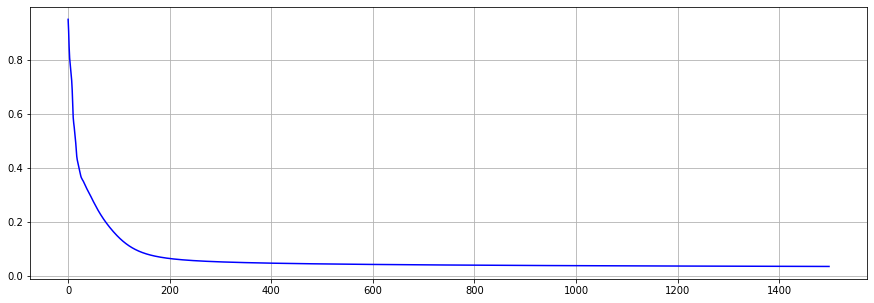

In [56]:
plt.figure(figsize=(15,5))
plt.plot(Err[:i],'b')
plt.grid(True)
#estimar saídas com rede treinada
U=np.dot(W1.T,X)+b1
V=np.tanh(U)
z=np.dot(W2.T,V)
yh=np.tanh(z).squeeze()


## Visualizar saídas da rede

Nº de erros: 10


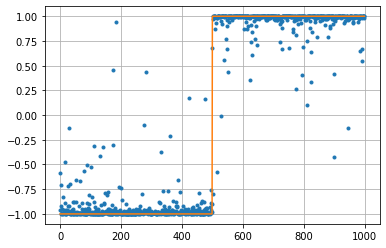

In [50]:
plt.plot(yh,'.')
plt.plot(y)
plt.grid(True)
ye=(yh>=0)*2-1
print('Nº de erros:',np.sum(y!=ye))

## Visualizar erros de classificação

Nº de erros: 10


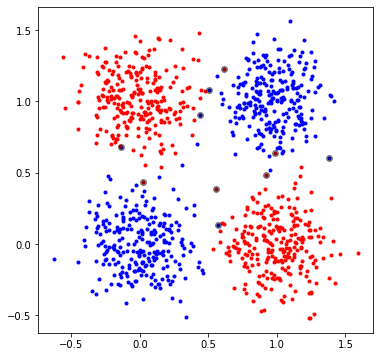

In [51]:
plt.figure(figsize=(6,6))
ye=(yh>=0)*2-1
plt.plot(X[0,y==-1],X[1,y==-1],'.b')
plt.plot(X[0,y==1],X[1,y==1],'.r')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.4)
print('Nº de erros:',np.sum(y!=ye))


## Fazer grelha e visualizar saída da rede

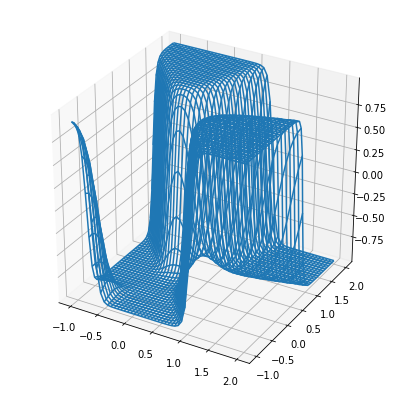

In [52]:
gX,gY=np.meshgrid(np.linspace(-1,2,50),np.linspace(-1,2,50))
X2=np.vstack((gX.ravel(),gY.ravel()))
U=np.dot(W1.T,X2)+b1
V=np.tanh(U)
z=np.dot(W2.T,V)
yh=np.tanh(z)
Yh=np.reshape(yh,(50,50))

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
#ax.contour3D(gX,gY,Yh,50,cmap='binary')
ax.plot_wireframe(gX,gY,Yh)